In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import sys
sys.path.append('../data/tecantaloupe/')

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

import seaborn as sns
from utils import *

matplotlib.rcParams.update({'font.size': 30})

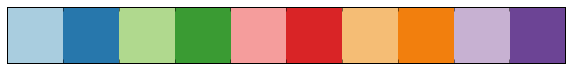

In [2]:
sns.palplot(qual_palette)

In [43]:
short_names = {'HNEAP_RS04610': 'ParA',
               'HNEAP_RS04615': 'acRAF',
               'HNEAP_RS04635': 'csos4B',
               'HNEAP_RS04605': 'unk.',
               'HNEAP_RS04585': 'dabA1',
               'HNEAP_RS04575': 'CbbQ',
               'HNEAP_RS04580': 'P-II',
               'HNEAP_RS04680': 'unk.',
               'HNEAP_RS04620': 'csos1B',
               'HNEAP_RS04625': 'csos1A',
               'HNEAP_RS04675': 'transporter',
               'HNEAP_RS04565': 'csos1D',
               'HNEAP_RS04685': 'NnrS',
               'HNEAP_RS04640': 'csos4A',
               'HNEAP_RS04600': 'cbbO',
               'HNEAP_RS04645': 'csoCA',
               'HNEAP_RS04555': 'TS',
               'HNEAP_RS04690': 'unk.',
               'HNEAP_RS04670': 'DUF302',
               'HNEAP_RS04595': 'dabB1',
               'HNEAP_RS04655': 'rbcS',
               'HNEAP_RS04570': 'unk.',
               'HNEAP_RS04630': 'csos1C',
               'HNEAP_RS04665': 'Cu-transporter',
               'HNEAP_RS04560': 'lgt',
               'HNEAP_RS04660': 'rbcL',
               'HNEAP_RS04590': 'unk.',
               'HNEAP_RS04650': 'csos2',
               'HNEAP_RS01020': 'GLUL',
               'HNEAP_RS01065': 'DUF839',
               'HNEAP_RS01030': 'dabA2',
               'HNEAP_RS01045': 'DUF3817',
               'HNEAP_RS01010': 'DNA-binding',
               'HNEAP_RS01050': 'PTH',
               'HNEAP_RS01025': 'TspO',
               'HNEAP_RS01055': 'unk.',
               'HNEAP_RS01015': 'kinase',
               'HNEAP_RS01035': 'dabB2',
               'HNEAP_RS01060': 'thioredoxin',
               'HNEAP_RS01040': 'LysR',
               'HNEAP_RS07310': 'unk.',
               'HNEAP_RS07320': 'Crp/Fnr',
               'HNEAP_RS07315': 'unk.',
               'HNEAP_RS07325': 'PP-ase',
               'HNEAP_RS05485': 'tRNA-Met',
               'HNEAP_RS12520': 'unk.',
               'HNEAP_RS05495': 'VWA',
               'HNEAP_RS05480': 'diguanylate cyclase',
               'HNEAP_RS05490': 'LysR'}
gene_colors = {
    'HNEAP_RS04585': qual_palette[0],
    'HNEAP_RS04595': qual_palette[7],
    'HNEAP_RS01030': qual_palette[0],
    'HNEAP_RS01035': qual_palette[7],
    'HNEAP_RS01040': qual_palette[1],
    'HNEAP_RS05490': qual_palette[1]
}
# Arrow parameters
width = 0.05
headwidth = 0.085
height = 1e-5
head_scale = 0.2
len_per_bp = 1e-4

region = (983594-14000,986794+8000)

length_longest_axis = (max(region)-min(region))*len_per_bp

essentiality_colors = {
    'essential': qual_palette[9],
    'nonessential': qual_palette[3],
    'ambiguous': qual_palette[7], 
    'hcr': qual_palette[8]}

CA domain AA: 334
CA domain pct: 0.319108


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


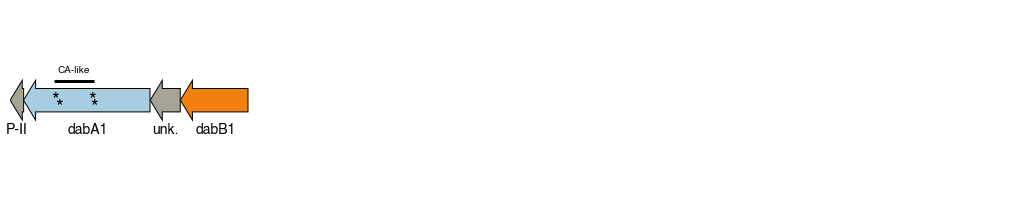

In [44]:
# Dab1 operon 
fig,ax = plt.subplots(figsize=(15, 3.5), frameon=False)

plt.ylim(0, 0.4)
region = (983594-10000,983594-4000)


homology_tasser = [x*3*len_per_bp for x in [462,464,721,736]]
homology_phyre_and_tasser = [714, 796,462,464,721,736 ]
homology_AA = [max(homology_phyre_and_tasser),min(homology_phyre_and_tasser)]
print('CA domain AA: %d'%(homology_AA[0]-homology_AA[1]))
homology_bp = [x*3 for x in homology_AA]
homology_distance = [x*len_per_bp for x in homology_bp]

y = 0.2

insert_color = qual_palette[1]



region_start, region_end = region
region_length = region_end - region_start

genes_in_region = essentiality_df[(essentiality_df.begin >= region_start) & 
                                  (essentiality_df.end <= region_end)]
insert_in_region = total_pool_df[(total_pool_df.pos >= region_start) & 
                                 (total_pool_df.pos <= region_end)]

for gene_idx in genes_in_region.index:
    gene = genes_in_region.loc[gene_idx]
    gene_name = short_names[gene.locusId]
    gene_length = gene.length_rep1
    gene_essentiality = essentiality_df.loc[gene_idx].essentiality
    length = gene_length * len_per_bp
    head_length = length*head_scale
    if length > 0.03:
        head_length = 0.03
    c = gene_colors.get(gene.locusId, greyish)

    gene_start = gene.begin
    gene_end = gene.end
    gene_strand = gene.strand

    if gene_strand == '+':
        start = (gene_start - region_start)*len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth, head_length=head_length, fill=True, facecolor=c)
        ax.add_artist(genePic)
        plt.text(start+length/2, y-0.07, gene_name, ha='center', fontsize=14)
    else:
        start = (gene_end - region_start) * len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, -length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth,
            head_length=head_length, fill=True,facecolor=c)
        ax.add_artist(genePic)
        plt.text(start-length/2, y-0.07, gene_name, ha='center', fontsize=14)
    if gene_name == 'dabA1':
        plt.hlines(y+0.04,start-homology_distance[0],start-homology_distance[1],lw=3)
        mean = (homology_distance[1]+homology_distance[0])/2
        print('CA domain pct: %f'%((homology_bp[0]-homology_bp[1])/gene_length))
        plt.text(start-mean, y+0.06, 'CA-like', ha='center', fontsize=10)
        for i,site in enumerate(homology_tasser):
            plt.text(start-site-(i*0.005), y-((i+1)%2)*0.015, '*',va='center', ha='center', fontsize=20)

# poses = (insert_in_region.pos - region_start) * len_per_bp
# n_positions = len(poses)

# bottoms = [y+height+headwidth/2 + 0.045]*n_positions
# tops = bottoms + (height*insert_in_region.n_total)
# plt.vlines(poses, bottoms, tops, colors='k')

# bottoms = np.array([y+height+headwidth/2+0.01]*n_positions)
# tops = bottoms + 0.03
# plt.vlines(poses, tops, bottoms, colors=insert_color, linewidth=0.75)

# print(dict(zip(genes_in_region.locusId, genes_in_region.desc)))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0,length_longest_axis)
plt.tight_layout()

plt.savefig('fig3/fig3A_sub2.eps', format='eps', bbox_inches='tight')
plt.show()

CA domain AA: 272
CA domain pct: 0.328635


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


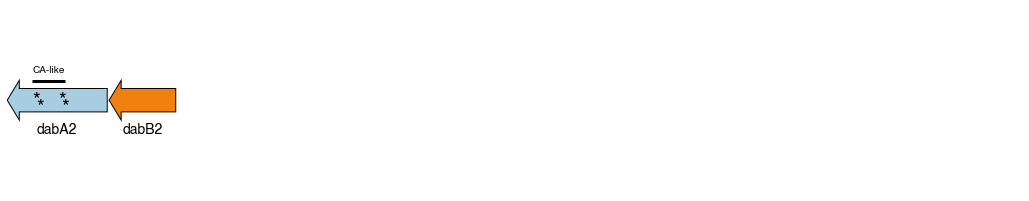

In [46]:
# Dab2 operon 
fig,ax = plt.subplots(figsize=(15, 3.5), frameon=False)

homology_tasser = [x*3*len_per_bp for x in [351,353,524,539]]
homology_phyre_and_tasser = [517,623,351,353,524,539]
homology_AA = [max(homology_phyre_and_tasser),min(homology_phyre_and_tasser)]
print('CA domain AA: %d'%(homology_AA[0]-homology_AA[1]))
homology_bp = [x*3 for x in homology_AA]
homology_distance = [x*len_per_bp for x in homology_bp]

plt.ylim(0, 0.4)
region = (216936, 219419+1800)
y = 0.2

insert_color = qual_palette[1]

# Arrow parameters
width = 0.05
headwidth = 0.085
height = 1e-5
head_scale = 0.2
len_per_bp = 1e-4

region_start, region_end = region
region_length = region_end - region_start

genes_in_region = essentiality_df[(essentiality_df.begin >= region_start) & 
                                  (essentiality_df.end <= region_end)]
insert_in_region = total_pool_df[(total_pool_df.pos >= region_start) & 
                                 (total_pool_df.pos <= region_end)]

for gene_idx in genes_in_region.index:
    gene = genes_in_region.loc[gene_idx]
    gene_name = short_names[gene.locusId]
    gene_length = gene.length_rep1
    gene_essentiality = essentiality_df.loc[gene_idx].essentiality
    length = gene_length * len_per_bp
    head_length = length*head_scale
    if length > 0.03:
        head_length = 0.03
    c = gene_colors.get(gene.locusId, greyish)

    gene_start = gene.begin
    gene_end = gene.end
    gene_strand = gene.strand

    if gene_strand == '+':
        start = (gene_start - region_start)*len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth, head_length=head_length, fill=True, facecolor=c)
        ax.add_artist(genePic)
        plt.text(start+length/2, y-0.07, gene_name, ha='center', fontsize=14)
    else:
        start = (gene_end - region_start) * len_per_bp
        genePic = matplotlib.patches.FancyArrow(
            start, y, -length, 0,
            width=width, length_includes_head=True,
            head_width=headwidth,
            head_length=head_length, fill=True,facecolor=c)
        ax.add_artist(genePic)
        plt.text(start-length/2, y-0.07, gene_name, ha='center', fontsize=14)
    if gene_name == 'dabA2':
        plt.hlines(y+0.04,start-homology_distance[0],start-homology_distance[1],lw=3)
        mean = (homology_distance[1]+homology_distance[0])/2
        print('CA domain pct: %f'%((homology_bp[0]-homology_bp[1])/gene_length))
        plt.text(start-mean, y+0.06, 'CA-like', ha='center', fontsize=10)
        for i, site in enumerate(homology_tasser):
            plt.text(start-site-(i*0.005), y-((i+1)%2)*0.015, '*',va='center', ha='center', fontsize=20)

# poses = (insert_in_region.pos - region_start) * len_per_bp
# n_positions = len(poses)

# bottoms = [y+height+headwidth/2 + 0.045]*n_positions
# tops = bottoms + (height*insert_in_region.n_total)
# plt.vlines(poses, bottoms, tops, colors='k')

# bottoms = np.array([y+height+headwidth/2+0.01]*n_positions)
# tops = bottoms + 0.03
# plt.vlines(poses, tops, bottoms, colors=insert_color, linewidth=0.75)

# print(dict(zip(genes_in_region.locusId, genes_in_region.desc)))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0,length_longest_axis)
plt.tight_layout()

plt.savefig('fig3/fig3A_sub1.eps', format='eps', bbox_inches='tight')
plt.show()

In [6]:
def prepAndNormalize(ps,timecourse,cutoffTime):
    blanked = timecourse.blank()
    smoothed = blanked.smooth()
    data = smoothed.data_for_label('abs600')
    yld = smoothed.GrowthYieldCutoff(cutoffTime,density_label='abs600')
    name2well = ps.name_to_well_mapping()

    yld = pd.DataFrame(yld, index=['yield']).T
    grouped_yld = yld.groupby(ps.well_to_name_mapping())
    mean_yield = grouped_yld.mean()
    
    normalized_yld = yld / mean_yield.loc['bw+pFE-sfGFP']
    normalized_mean_yld = normalized_yld.groupby(ps.well_to_name_mapping()).mean()
    normalized_std_yld = normalized_yld.groupby(ps.well_to_name_mapping()).std()
    return( (normalized_mean_yld,normalized_std_yld,grouped_yld) )

../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


pval for comparison of CAF+pFE-DAB2_wt and CAF+pFE-DUF is: 2.04E-08
pval for comparison of CAF+pFE-DAB2_wt and CAF+pFE-NDH is: 1.99E-08
pval for comparison of CAF+pFE-DAB2_wt and CAF+pFE-sfGFP is: 2.34E-08


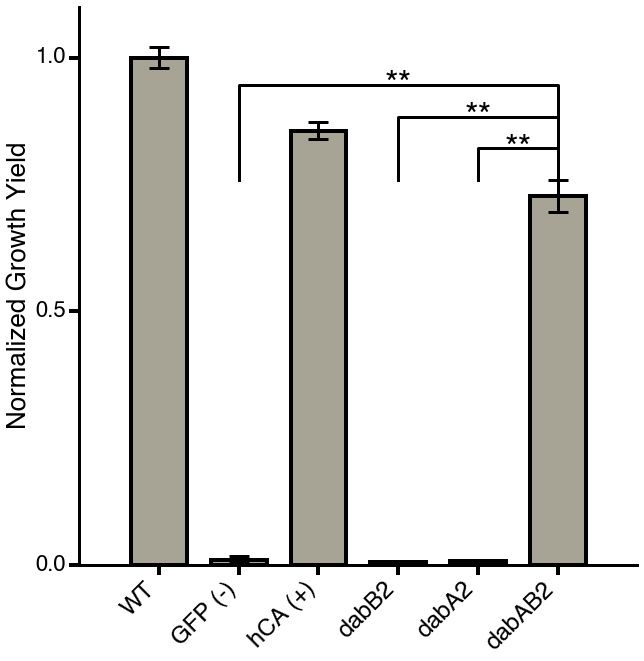

In [33]:
fig,ax = plt.subplots(figsize=(10,10))

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')

parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')
normalized_mean_yld,normalized_std_yld,grouped_yld=prepAndNormalize(ps,timecourse,24)

#     print(data)
to_plot = [
    ('bw+pFE-sfGFP', 'WT'),
    ('CAF+pFE-sfGFP', 'GFP (-)'),
    ('CAF+pFE-HCA2', 'hCA (+)'),
    ('CAF+pFE-NDH', 'dabB2'),
    ('CAF+pFE-DUF', 'dabA2'),
    ('CAF+pFE-DAB2_wt', 'dabAB2'),
]

to_test = [
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DUF',5,4),
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-NDH',5,3),
#     ('CAF+pFE-DAB2_wt', 'CAF+pFE-HCA2',5,2),
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-sfGFP',5,1),
]


labels = [name for label, name in to_plot]
ylds = [normalized_mean_yld.loc[t[0]][0] for t in to_plot]
stds = [normalized_std_yld.loc[t[0]][0] for t in to_plot]

xs = np.arange(len(ylds))
plt.bar(xs, ylds, yerr=stds, color=greyish, align='center', ecolor='k', width=0.7, edgecolor='k',
        linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})

# print(grouped_yld)
i=0
for test1,test2,x1,x2 in to_test:
    i+=1
    y=max(ylds[x1]+stds[x1],0)#,ylds[x2]+stds[x2])
    h=i/16
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(grouped_yld.get_group(test1)['yield'],grouped_yld.get_group(test2)['yield'])
    pval_corrected=pval*len(to_test)
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E'%(test1,test2,pval_corrected))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=35)
    
    

plt.ylabel('Normalized Growth Yield', fontsize=26)

plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.ylim(0.0, 1.1)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig3/fig3B.eps',format='eps',bbox_inches='tight')
plt.show()

../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


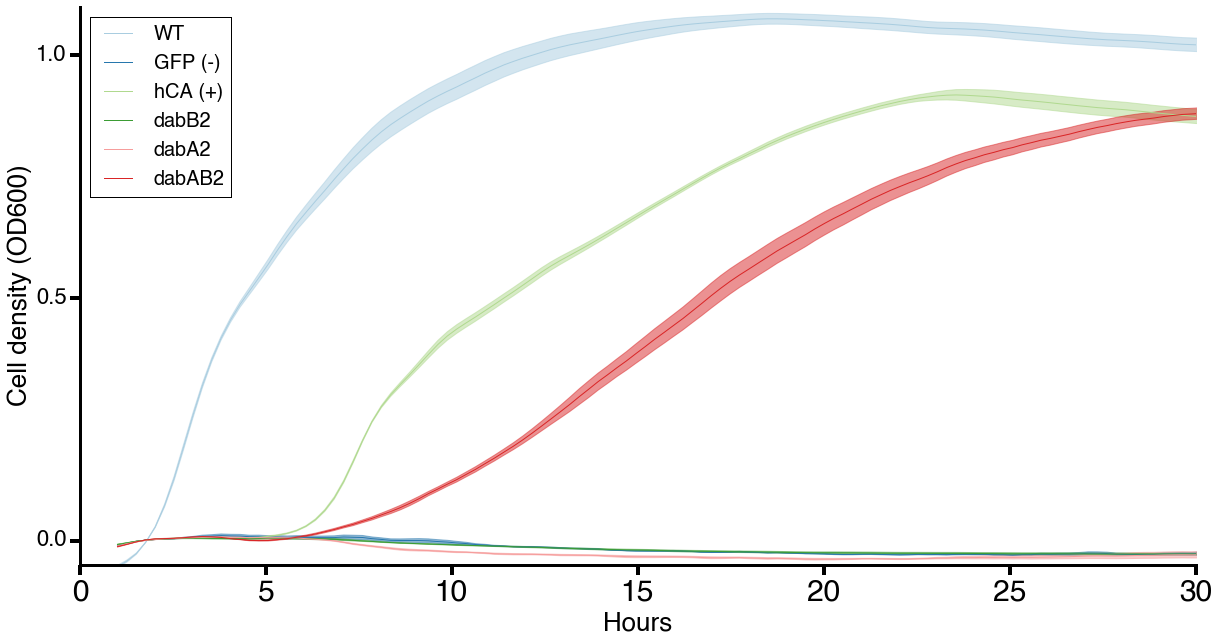

In [50]:
fig,ax = plt.subplots(figsize=(20,10))

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')


parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')
blanked = timecourse.blank()
smoothed = blanked.smooth()

means = smoothed.mean_by_name(ps)
sems = smoothed.sem_by_name(ps)

mean_OD = means.data_for_label('abs600')
sems_OD = sems.data_for_label('abs600')

time_h = mean_OD.time_s / (60.0*60.0)

#     print(data)
to_plot = [
    ('bw+pFE-sfGFP', 'WT'),
    ('CAF+pFE-sfGFP', 'GFP (-)'),
    ('CAF+pFE-HCA2', 'hCA (+)'),
    ('CAF+pFE-NDH', 'dabB2'),
    ('CAF+pFE-DUF', 'dabA2'),
    ('CAF+pFE-DAB2_wt', 'dabAB2'),
]


labels = [name for label, name in to_plot]

for i, tp in enumerate(to_plot):
    c,label = tp
    color = qual_palette[i % len(qual_palette)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color)
    
plt.xlim(0,30)

plt.ylabel('Cell density (OD600)', fontsize=26)
plt.xlabel('Hours', fontsize=26)

# plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.ylim(-0.05, 1.1)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
plt.legend(loc=0,fontsize=20)
    
plt.savefig('fig3/fig3S2.eps',format='eps',bbox_inches='tight')
plt.show()

{}

../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


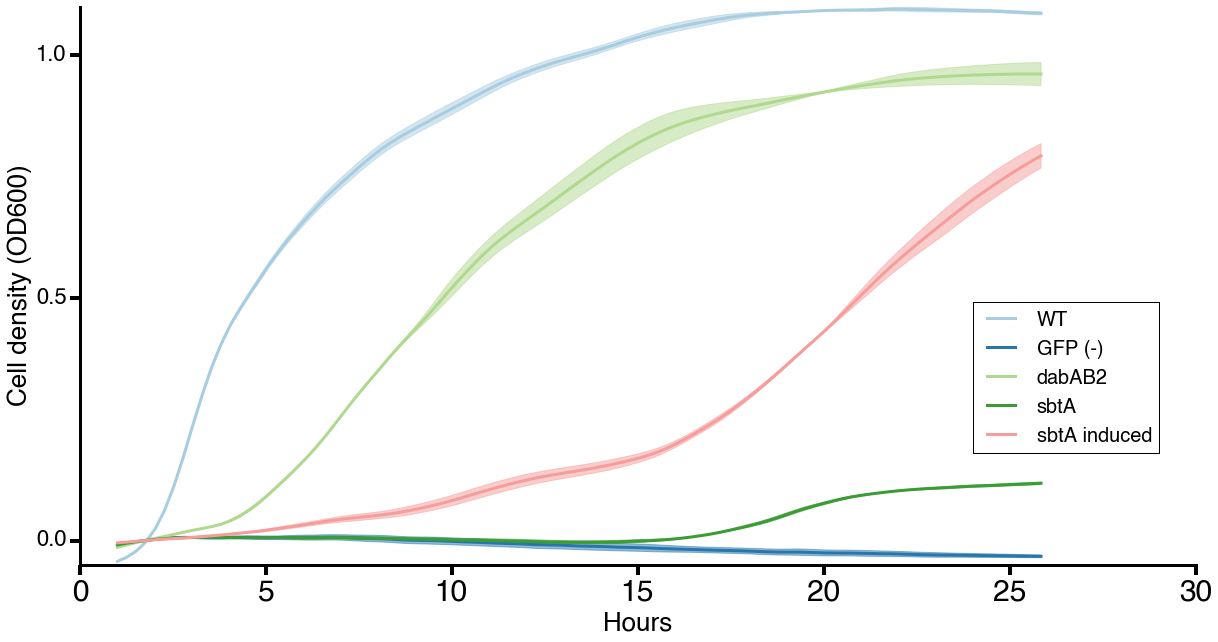

In [54]:
fig,ax = plt.subplots(figsize=(20,10))

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_04_02_pFA_with_ethoxazoleamin.csv')

parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_04_04_DAB2_ethoxazolamide.xlsx')
blanked = timecourse.blank()
smoothed = blanked.smooth()

means = smoothed.mean_by_name(ps)
sems = smoothed.sem_by_name(ps)

mean_OD = means.data_for_label('abs600')
sems_OD = sems.data_for_label('abs600')

time_h = mean_OD.time_s / (60.0*60.0)

#     print(data)
to_plot = [
    ('BW+pFA-sfGFP', 'WT'),
#     ('BW+pFA-sfGFP+atc', 'WT induced'),
    ('CAF+pFA-sfGFP', 'GFP (-)'),
#     ('CAF+pFA-sfGFP+atc', 'GFP (-) induced'),
    ('CAF+pFA-DAB2', 'dabAB2'),
#     ('CAF+pFA-DAB2+atc', 'dabAB2 induced'),
    ('CAF+pFA-SbtA', 'sbtA'),
    ('CAF+pFA-SbtA+atc', 'sbtA induced'),
]


labels = [name for label, name in to_plot]

for i, tp in enumerate(to_plot):
    c,label = tp
    color = qual_palette[i % len(qual_palette)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color,lw=3)
    
plt.xlim(0,30)

plt.ylabel('Cell density (OD600)', fontsize=26)
plt.xlabel('Hours', fontsize=26)

# plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.ylim(-0.05, 1.1)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
plt.legend(loc=[.8,.2],fontsize=20)
    
plt.savefig('fig3/fig3S3.eps',format='eps',bbox_inches='tight')
plt.show()

pval for comparison of [('DAB2', 'DMSO'), 'CPMA'] and [('DAB2', 'CCCP'), 'CPMA'] is: 6.81E-04
pval for comparison of [('DAB2', 'DMSO'), 'CPMA'] and [('SbtA', 'DMSO'), 'CPMA'] is: 1.03E-02
pval for comparison of [('DAB2', 'DMSO'), 'CPMA'] and [('GFP', 'DMSO'), 'CPMA'] is: 2.76E-04
pval for comparison of [('DAB2', 'DMSO'), 'CPMA'] and [('CAN', 'DMSO'), 'CPMA'] is: 1.31E-03


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


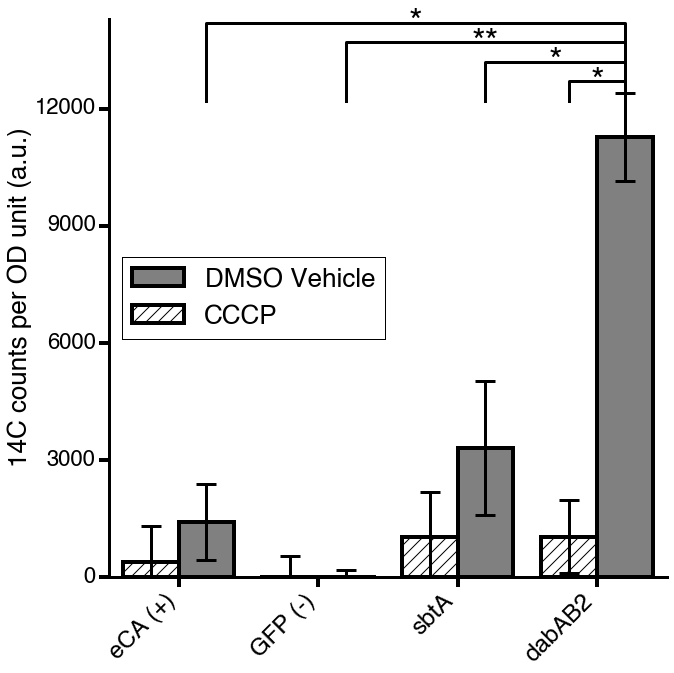

In [41]:
fig,ax = plt.subplots(figsize=(10,10))


ncols = ['grey', 'w']
nhatch = ['', '//']
# matplotlib.rcParams['hatch.linewidth'] = 0.1 

counts = pd.read_excel("../data/bicarbUptake/2018_11_01_BicarbUptake_gradientCouple_pFA.xlsx")
for col in ['number','CPMA','CPMB','SIS','tSIE']:
    counts.loc[:,col]=counts.loc[:,col].astype('float')
counts=counts[counts.cells!='Curve']

togroup = counts.drop(['vial','SIS','tSIE','number','Time','CPMB'],axis=1)
togroup[togroup.select_dtypes(include=['number']).columns]=togroup[togroup.select_dtypes(include=['number']).columns]/(0.8*0.6*(0.2/0.8272))


grouped = togroup.groupby(['cells','res'])

displayOrder=['CAN','GFP','SbtA','DAB2']

colOrder=[('CPMA','DMSO'),('CPMA','CCCP')]
labels=['DMSO Vehicle','CCCP']
ticks=['eCA (+)','GFP (-)','sbtA','dabAB2']



# print(grouped.groups)


means = grouped.mean()
#     print(means)
means.loc[:,'CPMA'] = means.loc[:,'CPMA']-means.loc[('Blank'),'CPMA']
unstackedMeans = means.unstack().loc[displayOrder][colOrder]
# print(unstackedMeans)
# print(means)

stds = grouped.std()
stds.loc[:,'CPMA'] = (stds.loc[:,'CPMA']**2+stds.loc[('Blank'),'CPMA']**2)**0.5
unstackedStds = stds.unstack().loc[displayOrder][colOrder]

width = 0.4
offsets=[width/2,-width/2]
for i, col in enumerate(colOrder):
#         figuring out number of ODs of cells per assay to normalize... we have 0.8 ml at 0.6 OD, we add 0.0272 ml of volume
#         then we take 0.2 ml per experiment. so thats 0.8*0.6*(0.2/0.8272)
    data = unstackedMeans[col]
    stds = unstackedStds[col]
    xs = np.arange(len(data))+offsets[i]

    plt.bar(xs, data, yerr=stds, color=ncols[i], align='center', hatch=nhatch[i],
            ecolor='k', width=width, edgecolor='k',label=labels[i],
            linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})

    
to_test = [
    ([('DAB2','DMSO'),'CPMA'], [('DAB2','CCCP'),'CPMA'],3+offsets[0],3+offsets[1]),
    ([('DAB2','DMSO'),'CPMA'], [('SbtA','DMSO'),'CPMA'],3+offsets[0],2+offsets[0]),
    ([('DAB2','DMSO'),'CPMA'], [('GFP','DMSO'),'CPMA'],3+offsets[0],1+offsets[0]),
    ([('DAB2','DMSO'),'CPMA'], [('CAN','DMSO'),'CPMA'],3+offsets[0],0+offsets[0]),
]    
i=0
for test1,test2,x1,x2 in to_test:
    i+=1
    y=max(means.loc[test1[0]][0]+stds.loc[test1[0][0]],means.loc[test2[0]][0]+stds.loc[test2[0][0]])
#     print(y)                                                                        
    h=i*500
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(grouped.get_group(test1[0])[test1[1]],grouped.get_group(test2[0])[test2[1]])
    pval_corrected=pval*len(to_test)
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E'%(test1,test2,pval_corrected))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=35)
    
    
xs = np.arange(len(data))
plt.xticks(xs, ticks, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                    length=10, width=4)
plt.yticks(np.arange(0, 12001, 3000), fontsize=22)
plt.ylim(0.0, 14300)

plt.legend(fontsize=26,loc=6)
#     plt.title('Blanked bicarbonate uptake')
plt.ylabel('14C counts per OD unit (a.u.)')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)


#     print(unstackedStds)
#     print(unstackedMeans)
    
    
plt.savefig('fig3/fig3C.eps',format='eps',bbox_inches='tight')

plt.show()